# Arguments

In [4]:
# inceptionv3-ft-pv-self-eb,ap,lm,ct

num_of_epochs = 100
batch_size = 32
dataset_path_plantvillage = '../datasets/plantvillage'
dataset_path_self = '../datasets/self'
dataset_path_validation = '../datasets/validation'

dataset_paths = [dataset_path_plantvillage, dataset_path_self, dataset_path_validation]

final_model_path= 'model-final.h5'

input_width = 224
input_height = 224
input_depth = 3


# Select training classes

In [5]:
class_paths_validation = ['../datasets/validation/___Late_blight', '../datasets/validation/___Early_blight', '../datasets/validation/___Septoria_leaf_spot', '../datasets/validation/___Bacterial_spot']

# Load dataset

In [6]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from keras.preprocessing.image   import ImageDataGenerator
from keras.optimizers import RMSprop
from keras.layers import Input
from keras.models import Model
from keras .applications import VGG16
from keras.optimizers import SGD
from keras.models import Model
from imutils import paths
import numpy as np
import os

import sys
sys.path.append('..')

from utils.preprocessors.resize_image_preprocessor import resizeImagePreprocessor
from utils.preprocessors.img_to_array_preprocessor import ImgToArrayPreprocessor
from utils.io.dataset_loader import DatasetLoader

# Load image paths
image_paths = []
print("[INFO] loading images...")
for path in class_paths_validation:
    image_paths.extend(list(paths.list_images(path)))

# Get unique classnames
class_names = [pt.split(os.path.sep)[-2] for pt in image_paths]
class_names = [str(x) for x in np.unique(class_names)]

# Initial image preprocessing
aap = resizeImagePreprocessor(input_width, input_height)
iap= ImgToArrayPreprocessor()

#Load image data and perform image data preprocessing
dl = DatasetLoader(preprocessors=[aap,iap])
(test_x,test_y)  = dl.load(image_paths,verbose=500)
test_x = test_x.astype("float") / 255.0

# convert the labels from integers to vectors
test_y = LabelBinarizer().fit_transform(test_y)



Using TensorFlow backend.


[INFO] loading images...


In [7]:
print(len(class_names))
print(class_names)

4
['___Bacterial_spot', '___Early_blight', '___Late_blight', '___Septoria_leaf_spot']


# Load model from disk

In [8]:
# import tensorflow as tf
# print(tf.__version__)


# model = tf.keras.models.load_model(
#     final_model_path,
#     custom_objects=None,
#     compile=False
# )

from keras.models import load_model

model = load_model(final_model_path)

# Evaluate

In [9]:
from sklearn.metrics import classification_report

print("[INFO] evaluating after initialization...")
predictions = model.predict(test_x,batch_size=batch_size)

print(classification_report(test_y.argmax(axis =1),
                            predictions.argmax(axis =1),
                            target_names=class_names, 
                            digits=4))

[INFO] evaluating after initialization...
                       precision    recall  f1-score   support

    ___Bacterial_spot     0.6000    0.2368    0.3396        38
      ___Early_blight     0.3750    0.3673    0.3711        49
       ___Late_blight     0.6812    0.7966    0.7344       118
___Septoria_leaf_spot     0.1818    0.2857    0.2222         7

             accuracy                         0.5802       212
            macro avg     0.4595    0.4216    0.4168       212
         weighted avg     0.5794    0.5802    0.5628       212



# Accuracy

In [10]:
ev = model.evaluate(test_x, test_y)
print(ev)

212/212 [==============================] - 14s 68ms/step
[2.0184986861246936, 0.5801886916160583]


In [11]:
acc = ev[1] * 100

print('accuracy : ' +  str("%.4f" % round(acc, 4)))

accuracy : 58.0189


# Confusion Matrix

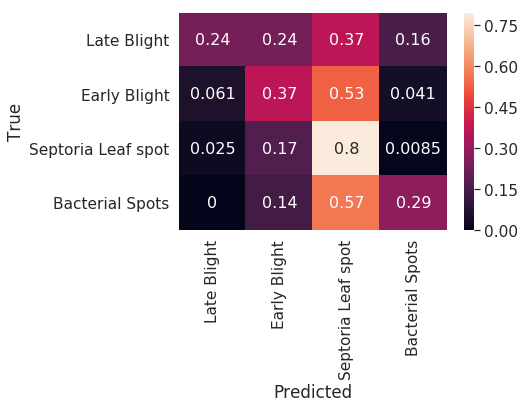

In [13]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

class_names = ['Late Blight', 'Early Blight', 'Septoria Leaf spot', 'Bacterial Spots']

matrix = confusion_matrix(test_y.argmax(axis=1), predictions.argmax(axis=1))
matrix_normalized = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

df_cm = pd.DataFrame(matrix_normalized, range(len(class_names)), range(len(class_names)))
# plt.figure(figsize=(10,7))
sn.set(font_scale=1.4) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}, xticklabels=class_names, yticklabels=class_names) # font size


# Add axis labels
plt.ylabel('True')
plt.xlabel('Predicted')
plt.show()

# x is predicted
# y is true
